# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine') 

In [3]:
print('train:',len(x_train))
print('test :',len(x_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_test.shape

(10000, 1)

In [8]:
y_test

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

In [9]:
#針對物件圖像數據集的類別編列成字典


coarse_label = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]
##beaver, dolphin, otter, seal, whale
##fish	aquarium fish, flatfish, ray, shark, trout
##flowers	orchids, poppies, roses, sunflowers, tulips
##food containers	bottles, bowls, cans, cups, plates
##fruit and vegetables	apples, mushrooms, oranges, pears, sweet peppers
##household electrical devices	clock, computer keyboard, lamp, telephone, television
##household furniture	bed, chair, couch, table, wardrobe
##insects	bee, beetle, butterfly, caterpillar, cockroach
#large carnivores	bear, leopard, lion, tiger, wolf
#large man-made outdoor things	bridge, castle, house, road, skyscraper
#large natural outdoor scenes	cloud, forest, mountain, plain, sea
#large omnivores and herbivores	camel, cattle, chimpanzee, elephant, kangaroo
#medium-sized mammals	fox, porcupine, possum, raccoon, skunk
#non-insect invertebrates	crab, lobster, snail, spider, worm
#people	baby, boy, girl, man, woman
#reptiles	crocodile, dinosaur, lizard, snake, turtle
#small mammals	hamster, mouse, rabbit, shrew, squirrel
#trees	maple, oak, palm, pine, willow
#vehicles 1	bicycle, bus, motorcycle, pickup truck, train
#vehicles 2	lawn-mower, rocket, streetcar, tank, tractor

##

In [10]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>100: num=100 
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
        #title= i        
        title=str(i)+','+coarse_label[labels[i][0]]
        if len(prediction)>0:
            title=label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

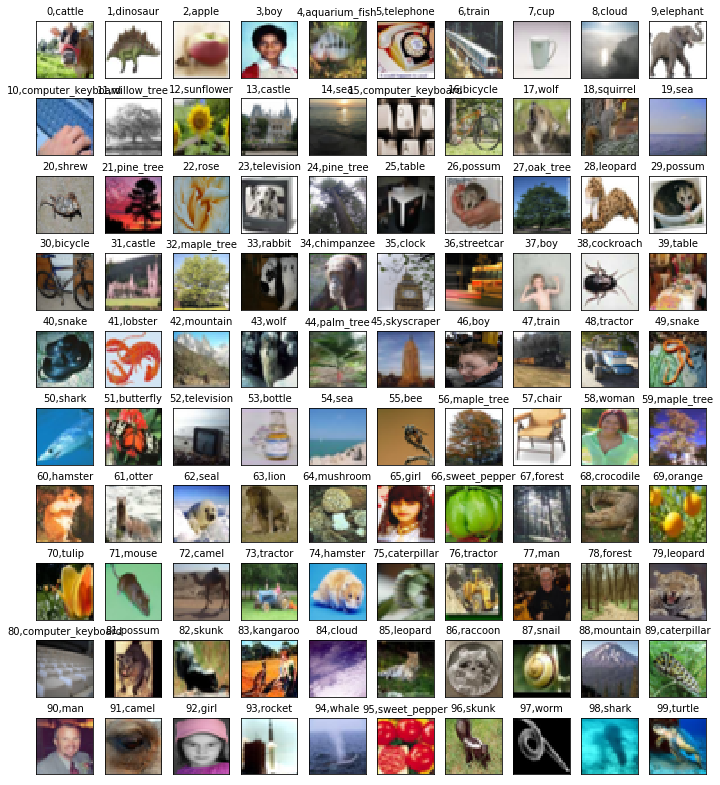

In [11]:
#針對不同的影像作標記

plot_images_labels_prediction(x_train,y_train,[],0)


# Image normalize 

In [12]:
x_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [13]:
x_train_normalize = x_train.astype('float32') / 255.0
x_test_normalize = x_test.astype('float32') / 255.0

In [14]:
x_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [18]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_train)
y_label_test_OneHot = np_utils.to_categorical(y_test)

In [19]:
y_label_train_OneHot.shape

(50000, 100)

In [20]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.